<a href="https://colab.research.google.com/github/TimeryaevaM/new_rep/blob/master/diplom_3v.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1192]:
import pandas as pd
import os
import csv
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from numpy import percentile

In [1185]:
def data_outlier(columns_list, df):

    data_out = pd.DataFrame(data = {'name': [], 'count': [], 'min': [], 'mean': [], 'max': [], 
                                    'low_range': [], 'upper_range': [], 'out_count': []
                                   })
    for column_name in columns_list:
        perc25 = percentile(df[column_name], 25)
        perc75 = percentile(df[column_name], 75)
        iqr = perc75 - perc25
        low_range = perc25 - 1.5 * iqr
        upper_range = perc75 + 1.5 * iqr
        out_count = df[column_name].apply(
            lambda x: None if x < low_range or x > upper_range else x).isna().sum()
        
        to_append = [column_name, df[column_name].count(), round(df[column_name].min(), 2), 
                     round(df[column_name].mean(), 2), round(df[column_name].max(), 2), 
                     round(low_range, 2), round(upper_range, 2), out_count]
        data_out_length = len(data_out)
        data_out.loc[data_out_length] = to_append
        
    return data_out

In [1032]:
# df = pd.read_csv("/data_new.csv", sep=",", quoting=csv.QUOTE_ALL, encoding='utf-8')

df = pd.read_csv("/data_new.csv")

In [1033]:
df.head()

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
0,Active,NaN,Single Family Home,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Gas Logs,Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900,28387,4,NC,NaN,NaN,NaN,611019,"$418,000"
1,for sale,NaN,single-family home,12911 E Heroy Ave,3 Baths,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",NaN,Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...","1,947 sqft",99216,3 Beds,WA,2.0,NaN,NaN,201916904,"$310,000"
2,for sale,NaN,single-family home,2005 Westridge Rd,2 Baths,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",yes,Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...","3,000 sqft",90049,3 Beds,CA,1.0,NaN,yes,FR19221027,"$2,895,000"
3,for sale,NaN,single-family home,4311 Livingston Ave,8 Baths,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",yes,Dallas,"[{'rating': ['9/10', '9/10', '10/10', '9/10'],...","6,457 sqft",75205,5 Beds,TX,3.0,NaN,NaN,14191809,"$2,395,000"
4,for sale,NaN,lot/land,1524 Kiscoe St,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,Palm Bay,"[{'rating': ['4/10', '5/10', '5/10'], 'data': ...",NaN,32908,NaN,FL,NaN,NaN,NaN,861745,"$5,000"


In [1034]:
df.shape

(377185, 18)

In [1035]:
df[df['target'].isna()].shape

(2481, 18)

In [1036]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   status        337267 non-null  object
 1   private pool  4181 non-null    object
 2   propertyType  342452 non-null  object
 3   street        377183 non-null  object
 4   baths         270847 non-null  object
 5   homeFacts     377185 non-null  object
 6   fireplace     103115 non-null  object
 7   city          377151 non-null  object
 8   schools       377185 non-null  object
 9   sqft          336608 non-null  object
 10  zipcode       377185 non-null  object
 11  beds          285903 non-null  object
 12  state         377185 non-null  object
 13  stories       226470 non-null  object
 14  mls-id        24942 non-null   object
 15  PrivatePool   40311 non-null   object
 16  MlsId         310305 non-null  object
 17  target        374704 non-null  object
dtypes: object(18)
memory usa

In [1037]:
print("Percent NULL values\n")
round(df.isna().sum() / df.shape[0] * 100, 2)

Percent NULL values



status          10.58
private pool    98.89
propertyType     9.21
street           0.00
baths           28.19
homeFacts        0.00
fireplace       72.66
city             0.01
schools          0.00
sqft            10.76
zipcode          0.00
beds            24.20
state            0.00
stories         39.96
mls-id          93.39
PrivatePool     89.31
MlsId           17.73
target           0.66
dtype: float64

Удаляем столбцы, где процент NULL значений больше 40%

In [1038]:
df.drop(['private pool', 'fireplace', 'mls-id', 'PrivatePool'], axis=1, inplace=True)

In [1039]:
df.nunique()

status             159
propertyType      1280
street          337076
baths              229
homeFacts       321009
city              2026
schools         297365
sqft             25405
zipcode           4549
beds              1184
state               39
stories            348
MlsId           232944
target           43939
dtype: int64

status

In [1040]:
df['status'] = df['status'].str.lower()

In [1041]:
import string
string.punctuation
string.digits

'0123456789'

In [1042]:
df['status'] = df['status'].str.replace('[{}]'.format(string.punctuation), ' ').str.replace('[{}]'.format(string.digits), ' ').apply(lambda x: " ".join(str(x).split()))
df['status'].value_counts()

for sale                   199571
active                     105207
nan                         39918
foreclosure                  6769
new construction             5475
                            ...  
pending sh                      1
pending w escape clause         1
reactivated                     1
backup                          1
contract                        1
Name: status, Length: 104, dtype: int64

In [1043]:
df['status'].nunique()

104

propertyType 

In [1044]:
df['propertyType'].sample(10)

186586                      single-family home
361658                                     NaN
40980                       single-family home
257547                      single-family home
18548            Condo/Townhome/Row Home/Co-Op
277758                      single-family home
134923                           Single Family
85242                                    condo
212866                               Townhouse
112835    Single Detached, Contemporary/Modern
Name: propertyType, dtype: object

In [1045]:
df['propertyType'] = df['propertyType'].str.lower()
df['propertyType'] = df['propertyType'].str.replace('[{}]'.format(string.punctuation), ' ').apply(lambda x: " ".join(str(x).split()))
df['propertyType'] = df['propertyType'].str.replace('one', '1').str.replace('two', '2')

In [1046]:
df['propertyType'].value_counts()[20:40]

contemporary modern           1010
apartment                      922
2 stories                      911
mfd mobile home                792
single detached                751
detached 2 story               638
2 story                        596
transitional                   560
cooperative                    535
florida                        530
bungalow                       442
farms ranches                  371
garden home                    305
cape cod                       281
2 stories traditional          280
spanish mediterranean          272
other style                    249
1 story traditional            238
other                          232
condo townhome traditional     225
Name: propertyType, dtype: int64

In [1047]:
df['stories_dop'] = df['propertyType'].str.findall(r'[a-z0-9]+ story|[a-z0-9]+ stories').apply(lambda x: None if len(x) == 0 else x[-1])
#.str.replace('one', '1').str.replace('two', '2')
df['stories_dop'].value_counts(dropna=False)

NaN          369527
1 story        4440
2 stories      1558
2 story        1466
3 stories       134
8 stories        38
7 stories        15
3 story           6
5 story           1
Name: stories_dop, dtype: int64

In [1048]:
set_story = set(df['stories_dop'].dropna())
for y in set_story:
  df['propertyType'] = df['propertyType'].str.replace(y, '')

In [1049]:
df[df['propertyType'].str.contains('home')]['propertyType'].value_counts()

single family home                                                                       123934
condo townhome row home co op                                                              7701
multi family home                                                                          1501
mfd mobile home                                                                             792
garden home                                                                                 305
                                                                                          ...  
condo townhome contemporary modern mediterranean spanish                                      1
condo townhome contemporary modern split level                                                1
cabin lodge contemporary converted barn cottage loft with bedrooms log home post beam         1
manufactured home double wide                                                                 1
coach carriage garden home              

In [1050]:
df['propertyType'] = df['propertyType'].str.replace('home', '')
df['propertyType'] = df['propertyType'].apply(lambda x: None if x == '' else
                                              None if str(x) == 'nan' else 
                                              None if str(x) == 'None' else " ".join(str(x).split()))

In [1051]:
df['propertyType'].nunique()

1112

In [1052]:
df['propertyType'].value_counts(dropna=False)

single family                                                                       186803
condo                                                                                42530
NaN                                                                                  38211
lot land                                                                             20552
townhouse                                                                            18401
                                                                                     ...  
historical conservation district single detached contemporary modern traditional         1
less than 4 floors villa                                                                 1
single detached colonial english                                                         1
dutch colonial                                                                           1
colonial contemporary multi level other yurt                                             1

street

In [1053]:
df['street'].value_counts(dropna=False)[1200:]

3409 N Narrows Dr     3
822 Seneca Pl         3
12117 Bob White Dr    3
2509 57th St SW       3
7410 Hemlock St       3
                     ..
1 Hatteras Ct         1
2601 Irma Ave N       1
611 Muirfield Loop    1
1412 Morris Rd SE     1
4332 Darron Dr        1
Name: street, Length: 335877, dtype: int64

In [1054]:
df['street'] = df['street'].str.lower()
df['street'] = df['street'].apply(lambda x: None if 'not disclosed' in str(x) else 
                                  None if 'undisclosed' in str(x) else
                                  None if 'not available' in str(x) else
                                  None if 'unknown' in str(x) else str(x))

In [1055]:
df.loc[(df['street'].isna()==False) & (df['street'].str.contains(r'mls ')), 'street'] = None

In [1056]:
df.loc[81361, 'street']

'1131 w 24th street st unit c '

In [1057]:
punct = string.punctuation
df['street'] = df['street'].str.replace('[{}]'.format(string.punctuation), ' ').str.replace(r'\b[0-9]+\b', '').str.replace('  ', ' ').str.strip()

In [1058]:
street_list_tuple = [('st', 'street'), ('dr', 'drive'), ('ave', 'avenue'), ('rd', 'road'), ('rdg', 'ridge'), ('blvd', 'boulevard'), ('pkwy', 'parkway'), 
                   ('cir', 'circle'), ('hwy', 'highway'), ('ln', 'lane'), ('lndg', 'landing'), ('trl', 'trail'), ('ter', 'terrace'), ('ct', 'court'), 
                   ('crk', 'creek'), ('pl', 'place'), ('rds', 'roads'), ('bnd', 'bend'), ('fls', 'falls'), ('clf', 'cliff'), ('clfs', 'cliff'), ('mtn', 'mountain'), 
                   ('crst', 'crest'), ('hl', 'hill'), ('ml', 'mill'), ('mnr', 'manor'), ('hts', 'heights')]       
                          

In [1059]:
def street_replace(df, st_tupl):

  # Функция замены коротких синонимов на полные названия и удаление дубликатов

  df['street'] = df['street'].str.replace(rf'\b{st_tupl[0]}\b', st_tupl[1]).str.replace(rf'\b{st_tupl[1]}\b \b{st_tupl[1]}\b', st_tupl[1])
  df['street'] = df['street'].str.replace('  ', ' ').str.strip()

  # print(f'replace {st_tupl[0]} to {st_tupl[1]}')

In [1060]:
for x in street_list_tuple:
  street_replace(df, x)

In [1061]:
def del_dropwords_street(df, dropword):

  # Удаляем dropword из признака street
  df['street'] = df['street'].str.replace(rf'\b{dropword}\b', '').str.replace(r'  ', ' ').str.strip()

  print(f"Drop {dropword}")

In [1062]:
dropwords = ['lot', 'lots', 'collections', 'collection', 'plan', 'apt', 'unit', 'buildable', 'the']

for x in dropwords:
  del_dropwords_street(df, x)

Drop lot
Drop lots
Drop collections
Drop collection
Drop plan
Drop apt
Drop unit
Drop buildable
Drop the


In [1063]:
# Удаляем мусор из строк, чтобы легче паттерны было выделять
df['street'] = df['street'].str.replace(r'\b[a-z]{1,2}\b', '').str.replace('  ', ' ').str.strip()
df['street'] = df['street'].str.replace(r'\b[0-9]+[a-z]\b', '').str.replace(r'\b[a-z]+[0-9]\b', '').str.replace(r'\b[0-9]+ft\b', '')
df['street'] = df['street'].str.replace(r'  ', ' ').str.strip()

In [1064]:
df['street'] = df['street'].apply(lambda x: None if x is None else
                                  None if x.strip() == '' else x)

In [1065]:
df['street'].sample(10)

77521          peachtree circle
230094    fredericksburg avenue
149093          roselawn street
353486              44th street
241868           woodlake drive
295640       kettle creek drive
327779           madison street
58097               vail avenue
115563              90th avenue
327310               7th avenue
Name: street, dtype: object

In [1066]:
# tokenizer

# ! pip install tokenizer

from keras.preprocessing.text import Tokenizer

In [1067]:
# The maximum number of words to be used. (most frequent)
MAX_WORDS = 10000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 10

In [1068]:
street_nlp = df[df['street'].isna() == False]['street'].copy()

In [1069]:
tokenize = Tokenizer(num_words=MAX_WORDS)
tokenize.fit_on_texts(street_nlp)

In [1070]:
# tokenize.word_index

# Токенайзер введем позже

baths

In [1071]:
df['baths'] = df['baths'].apply(lambda x: None if x is np.nan else x)
df['baths'].value_counts(dropna=False)

NaN           106338
2 Baths        52466
3 Baths        35506
2              20452
2.0            16576
               ...  
13 ba              1
5.2 Baths          1
29                 1
1.8 Baths          1
10.5 Baths         1
Name: baths, Length: 230, dtype: int64

In [1072]:
punct = '~—\-:'

In [1073]:
df['baths'] = df['baths'].str.lower().str.replace('[a-z]+\.?', '').str.replace(',', '.').str.replace('[{}]'.format(punct), ' ')
df['baths'] = df['baths'].apply(lambda x: None if str(x).strip() =='' else x)

In [1074]:
df['baths_new'] = df['baths'].str.findall('[0-9]+\.?[0-9]*')
df['baths_new'] = df['baths_new'].apply(lambda x: None if x is None else x[0]).astype(float)
df['baths_new'].value_counts()

# df['baths_new'].to_csv('out.csv')
# ванна 0.5 проверить

2.0     103519
3.0      66683
4.0      26333
1.0      17787
2.5      13786
         ...  
1.8          1
64.0         1
14.5         1
0.5          1
42.0         1
Name: baths_new, Length: 84, dtype: int64

city

In [1075]:
df['city'] = df['city'].str.lower().str.strip()
df['city'] = df['city'].str.replace('\-', ' ')

In [1076]:
df['city'] = df['city'].str.replace(' city', '').str.replace(' town+[a-z]*', '')
df['city'] = df['city'].str.replace('st\.', 'saint').str.replace(' twp.', '').str.replace('e. ', '').str.replace('ft.', 'fort').str.replace('s.a.', 'san antonio')
df['city'] = df['city'].str.replace(' twp', '').str.replace(' vlg', ' village')
df['city'] = df['city'].str.replace(' hts', 'heights').str.replace(' pt', 'point').str.replace('pt ', 'port ')
df['city'] = df['city'].str.replace('^st ', 'saint ')

In [1077]:
df.loc[(df['city'].isna()==False) & (df['city'].str.contains('san antonio')), 'city'] = 'san antonio'

In [1078]:
df['city'] = df['city'].str.replace('p c ', 'panama ').str.replace('^n ', 'north ').str.replace("town 'n' country", 'town north country')
df['city'] = df['city'].str.replace('nyork', 'new york').str.replace('nyc', 'new york')
df['city'] = df['city'].str.replace('bed-stuy', 'brooklyn').str.replace('collegepoint', 'college point')
df['city'] = df['city'].str.replace('othvalue [ a-z]*', 'othvalue')

In [1079]:
df['city'] = df['city'].apply(lambda x: " ".join(str(x).split()))

In [1080]:
df['city'].value_counts()

san antonio       30033
houston           24442
miami             15528
jacksonville      10032
dallas             8858
                  ...  
manvel                1
bow mar               1
mabank                1
la tuna canyon        1
celoron               1
Name: city, Length: 1785, dtype: int64

sqft

In [1081]:
df['sqft'].value_counts()

0                                          11854
1,200 sqft                                   839
1,000 sqft                                   654
1,100 sqft                                   573
1,800 sqft                                   563
                                           ...  
4542                                           1
Total interior livable area: 5,789 sqft        1
6,650                                          1
8,968 sqft                                     1
8800                                           1
Name: sqft, Length: 25405, dtype: int64

In [1082]:
df['sqft'] = df['sqft'].apply(lambda x: None if x is np.nan else x)

In [1083]:
df['sqft'] = df['sqft'].str.replace('[a-z ]*: ', '')
df['sqft'] = df['sqft'].str.replace('-','').str.replace('[A-Za-z]+','').str.replace(',','')

In [1084]:
df['sqft'] = df['sqft'].str.strip().apply(lambda x: None if x is None else 
                                          None if x == '' else int(x))

In [1085]:
df['sqft'].value_counts()

0.0         11854
1200.0       1426
1000.0       1027
1500.0       1014
1800.0        988
            ...  
8966.0          1
11089.0         1
123275.0        1
44351.0         1
32767.0         1
Name: sqft, Length: 9897, dtype: int64

zipcode

In [1086]:
df['zipcode'].value_counts()

32137         2141
33131         1563
34747         1488
78245         1390
34759         1333
              ... 
91763            1
27703-7978       1
79401            1
41759            1
77369            1
Name: zipcode, Length: 4549, dtype: int64

In [1087]:
df['zipcode'] = df['zipcode'].str.replace('\-[0-9]*', '').apply(lambda x: None if x is None else None if x == '' else int(x))

beds

In [1088]:
df['beds'] = df['beds'].apply(lambda x: None if x is np.nan else x).str.lower()

In [1089]:
df['beds'].value_counts(dropna=False)

NaN           91282
3 beds        53459
4 beds        35418
3             31406
2 beds        26362
              ...  
3,120 sqft        1
5.43 acres        1
7,352 sqft        1
7 acres           1
6,377 sqft        1
Name: beds, Length: 1185, dtype: int64

In [1090]:
index_sqft = df.loc[(df['sqft'].isna()) & (df['beds'].str.contains('sqft')), ['sqft','beds']].index
new_sqft = df.loc[(df['sqft'].isna()) & (df['beds'].str.contains('sqft')), ['sqft','beds']]
new_sqft['sqft'] = new_sqft['beds'].str.strip().str.replace(',', '.').str.findall('[0-9]+\.*[0-9]*').apply(lambda x: None if len(x) == 0 else x[0]).astype(float)

df.loc[(df['sqft'].isna()) & (df['beds'].str.contains('sqft')), 'sqft'] = new_sqft['sqft']
df.loc[(df['beds'].isna()==False) & (df['beds'].str.contains('sqft')), 'beds'] = None

In [1091]:
index_sqft = df.loc[(df['sqft'].isna()) & (df['beds'].str.contains('acre')), ['sqft','beds']].index
new_sqft = df.loc[(df['sqft'].isna()) & (df['beds'].str.contains('acre')), ['sqft','beds']]
new_sqft['sqft'] = new_sqft['beds'].str.strip().str.replace(',', '.').str.findall('[0-9]+\.*[0-9]*').apply(lambda x: None if len(x) == 0 else x[0]).astype(float)
new_sqft['sqft'] = (new_sqft['sqft'] * 43560).astype(int)

df.loc[(df['sqft'].isna()) & (df['beds'].str.contains('acre')), 'sqft'] = new_sqft['sqft']
df.loc[(df['beds'].isna()==False) & (df['beds'].str.contains('acre')), 'beds'] = None

In [1092]:
df['beds'] = df['beds'].str.replace('bedrooms', 'beds').str.replace('bd', 'beds')

In [1093]:
df.loc[(df['beds'].isna()==False) & (df['beds'].str.strip().str.contains('^[a-z,\-%@#_:;~ ]+$')), 'beds'] = None

In [1094]:
df['beds'].value_counts(dropna=False)[:20]

NaN       111390
3 beds     66336
4 beds     43683
2 beds     31605
3          31406
4          20030
2          16110
5 beds     13904
3.0         8088
5           6424
4.0         5231
1           4610
6 beds      4466
2.0         2430
6           1806
5.0         1372
7 beds      1247
0           1230
1 beds      1081
8 beds       856
Name: beds, dtype: int64

In [1095]:
new_bath = df.loc[(df['baths_new'].isna()) & (df['beds'].str.contains('bath')), 'beds'].str.findall('[0-9a-z ]+ bath').apply(lambda x: x[0].split()[0]).astype(float)
df.loc[new_bath.index, 'baths_new'] = new_bath
df.loc[new_bath.index, 'baths_new']

18787     1.0
124819    1.0
172605    1.0
238222    1.0
279149    2.0
325249    1.0
Name: baths_new, dtype: float64

In [1096]:
new_beds = pd.concat([(df.loc[(df['beds'].isna()==False) & (df['beds'].str.strip().str.contains('[0-9 a-z]+bed[a-z]*,')), 'beds']),
                      df.loc[(df['beds'].isna()==False) & (df['beds'].str.strip().str.contains(',[0-9 a-z]+bed[a-z]*')), 'beds']
                      ],
                     ).reset_index()
new_beds = new_beds.drop_duplicates().set_index('index')
new_beds['beds'] = new_beds['beds'].str.replace('or more ', '').str.findall('[0-9 ]+bed').apply(lambda x: x[0].split()[0]).astype(float)

df.loc[new_beds.index, 'beds'] = new_beds['beds']
df.loc[new_beds.index, 'beds']

index
18787     2
172605    2
200331    3
238222    3
325249    2
124819    2
279149    3
Name: beds, dtype: object

In [1097]:
punct = '!@#_,:;&'
df.loc[(df['beds'].isna()==False) & (df['beds'].str.contains('[{}]'.format(punct))), 'beds'] = None
punct = '\-'
new_beds = df.loc[(df['beds'].isna()==False) & (df['beds'].str.contains('[{}]'.format(punct))), 'beds'].str.findall('[0-9]+').apply(lambda x: x[-1]).astype(float)
df.loc[new_beds.index, 'beds'] = new_beds
df.loc[new_beds.index, 'beds']

330468    2
Name: beds, dtype: object

In [1098]:
df['beds'] = df['beds'].str.replace('or more ', '')
df['beds'] = df['beds'].str.replace('beds','').str.strip().apply(lambda x: None if x is None else
                                                                 None if x == '' else x).astype(float)

state

In [1099]:
df['state'].value_counts(dropna=False)[-20:]

UT    1325
MD    1090
VT     868
MO     866
VA     801
WI     452
NJ     436
ME     259
IA     242
KY      90
OK      49
MS      40
SC      28
MT       7
DE       5
OS       1
OT       1
AL       1
Fl       1
BA       1
Name: state, dtype: int64

stories

In [1100]:
df['stories_dop'] = df['stories_dop'].apply(lambda x: None if x is None else x.split()[0]).astype(float)
df['stories_dop'].value_counts()

1.0    4440
2.0    3024
3.0     140
8.0      38
7.0      15
5.0       1
Name: stories_dop, dtype: int64

In [1101]:
df['stories'] = df['stories'].str.lower()
df['stories'].value_counts(dropna=False)

# много пустых значений, не знаю, обрабатывать ли их

NaN                                           150715
1.0                                            67454
2.0                                            55283
1                                              23086
2                                              18146
                                               ...  
2 story, multi level                               1
1 level, 1.5 level                                 1
townhouse-2 story, t3-townhouse 3+ stories         1
1.2                                                1
apartments                                         1
Name: stories, Length: 349, dtype: int64

In [1102]:
# punct = '!|/_\-:;'
# df.loc[(df['stories'].isna()==False) & (df['stories'].str.contains('[{}]'.format(punct))), 'stories'].value_counts()
# df.loc[(df['stories'].isna()==False) & (df['stories'].str.contains('[0-9 ]/[0-9 ]')), 'stories'].value_counts()
# df.loc[(df['stories'].isna()==False) & (df['stories'].str.contains('half')), 'stories'].value_counts()
# df.loc[(df['stories'].isna()==False) & (df['stories'].str.contains('multi')), 'stories'].value_counts()


MlsId

In [1103]:
df = df.drop('MlsId', axis=1)

homeFacts

In [1104]:
df['homeFacts'] = df['homeFacts'].apply(lambda x: eval(x))

In [1105]:
df['homeFacts_new'] = df['homeFacts'].apply(lambda x: list(x.values())[0])

In [1106]:
list_columns = ['Year built', 'Remodeled year', 'Heating', 'Cooling', 'Parking', 'lotsize', 'Price/sqft']

for column in enumerate(list_columns):
  df[column[1]] = None
  df[column[1]] = df['homeFacts_new'].apply(lambda x: None if x[column[0]].get('factValue') == '' else  x[column[0]].get('factValue'))

Year built

In [1107]:
df['Year built'].value_counts(dropna=False)

NaN     62374
2019    32171
2006     8008
2005     7503
2007     7152
        ...  
1788        1
1780        1
1805        1
1808        1
1060        1
Name: Year built, Length: 230, dtype: int64

In [1108]:
df['Year built'] = df['Year built'].apply(lambda x: None if x is None else
                                          None if 'No' in x else int(x))

In [1109]:
df['Year built'].value_counts(dropna=False)

NaN       63596
2019.0    32171
2006.0     8008
2005.0     7503
2007.0     7152
          ...  
1805.0        1
1807.0        1
1808.0        1
1809.0        1
1019.0        1
Name: Year built, Length: 229, dtype: int64

Remodeled year

In [1110]:
df['Remodeled year'].value_counts(dropna=False)

# Слишком много пропусков, удалим потом столбец

NaN     226110
2006      5538
2005      4817
2007      4387
2008      3796
         ...  
1846         1
1853         1
1111         1
1800         1
1862         1
Name: Remodeled year, Length: 154, dtype: int64

Heating

In [1111]:
df['Heating'].value_counts(dropna=False)[:10]

# Слишком много пропусков и непоказательных данных, удалим потом столбец

NaN                 109332
Forced Air           82807
Forced air           51506
Other                29623
Electric             10211
Gas                   9296
No Data               8611
Central Air           7814
Central Electric      7112
Central               6247
Name: Heating, dtype: int64

Cooling

In [1112]:
df['Cooling'].value_counts(dropna=False)

# Слишком много пропусков и непоказательных данных, удалим потом столбец

Central                                                                      158754
NaN                                                                          123967
Central Air                                                                   14384
No Data                                                                       10616
Has Cooling                                                                    9730
                                                                              ...  
Central, Evaporative, Solar                                                       1
Heat Pump for A/C, Natural Gas                                                    1
Baseboard, Propane, Radiant                                                       1
Evaporative, Solar, Refrigeration                                                 1
Central A/C, Programmable Thermostat Cooling, Zoned Cooling, Dehumidifier         1
Name: Cooling, Length: 1445, dtype: int64

Parking

In [1113]:
df['Parking'].value_counts(dropna=False)[:10]

# Слишком много пропусков и непоказательных данных, удалим потом столбец

NaN                         175420
Attached Garage              70752
2 spaces                     28063
1 space                      14252
No Data                      13334
Detached Garage              13201
Carport                       7743
3 spaces                      4724
Off Street                    3622
Carport, Attached Garage      3025
Name: Parking, dtype: int64

lotsize sqft

In [1114]:
df[['lotsize', 'sqft']].sample(5)

,lotsize,sqft
69869,0.26 acres,2854.0
125599,None,922.0
22629,"10,454 sqft lot",NaN
127186,"6,055 Sq. Ft.",2711.0
173659,"6,031 sqft",1322.0


In [1115]:
df['lotsize'] = df['lotsize'].str.lower().str.replace(r'[\-,—]', '').str.strip().apply(lambda x: None if x is None else
                                                                                      None if 'no' in x else
                                                                                      None if x == '' else x)

In [1116]:
# Заполним те значения признака sqft которые пустые из признака lotsize

# acres
new_lot_size = df.loc[(df['sqft'].isna()) & (df['lotsize'].isna()==False) & (df['lotsize'].str.contains('sq'))]['lotsize']
new_lot_size = new_lot_size.str.lower().str.replace(r'[a-z \.]', '').str.strip()
new_lot_size = new_lot_size.apply(lambda x: None if x is None else 
                                  None if x is np.nan else
                                  None if x == '' else int(float(x)))
df.loc[new_lot_size.index, 'sqft'] = new_lot_size

# acres
new_lot_size = df.loc[(df['sqft'].isna()) & (df['lotsize'].isna()==False) & (df['lotsize'].str.contains('acre'))]['lotsize']
new_lot_size = new_lot_size.str.lower().str.replace('[a-z ]', '').str.strip()
new_lot_size = new_lot_size.apply(lambda x: None if x is None else float(x) * 43560).astype(int)
df.loc[new_lot_size.index, 'sqft'] = new_lot_size

# Другие!

In [1117]:
df['sqft'].isna().sum()

11890

Price/sqft

In [1118]:
df['Price/sqft'].sample(10)

312783          $77/sqft
282679              $359
36917     $188 / Sq. Ft.
57377               $384
361158    $833 / Sq. Ft.
56024          $311/sqft
53140          $253/sqft
31003               $291
363684              None
87489          $230/sqft
Name: Price/sqft, dtype: object

In [1119]:
df['Price/sqft'] = df['Price/sqft'].str.lower().str.replace(r'[,/$a-z\. ]', '').str.strip().apply(lambda x: None if x is None else
                                                                                      None if x == '' else int(x))

schools

In [1120]:
df['schools'] = df['schools'].apply(lambda x: eval(x)[0])

In [1121]:
list_keys = ['data', 'name', 'rating']
# name не будем брать

list_columns = ['Distance', 'Grades', 'rating']
# Grades не будем брать слишком запутано

df['Distance'] = df['schools'].apply(lambda x: None if x.get('data').get('Distance') is None else x.get('data').get('Distance'))
df['rating'] = df['schools'].apply(lambda x: None if x.get('rating') is None else x.get('rating'))

In [1122]:
df['Distance'] = df['Distance'].apply(lambda x: [float(y.replace('mi', '').strip()) for y in x])

In [1123]:
df['Distance'] = df['Distance'].apply(lambda x: list(filter(None, x)))

In [1124]:
df['Distance'].sample(10)

195568                           [2.48, 2.8, 6.43]
76841                                  [0.67, 0.1]
158665                   [0.8, 1.6, 2.8, 1.8, 3.8]
208146              [0.7, 1.4, 1.3, 0.4, 1.5, 3.0]
284968    [0.5, 2.1, 3.1, 2.2, 2.3, 2.4, 1.2, 1.6]
243215                                 [2.45, 0.8]
23482                                  [0.5, 1.48]
98791              [13.46, 2.21, 2.58, 1.48, 8.29]
229279                                [0.15, 0.31]
138972                          [0.88, 1.91, 0.34]
Name: Distance, dtype: object

In [1125]:
df['rating'] = df['rating'].apply(lambda x: [None if "NR" in str(y) else
                                             None if "None" in str(y) else
                                             None if "NA" in str(y) else
                                             None if str(y) == '' else
                                             int(str(y).split('/')[0]) if "/" in str(y) else
                                             int(y) for y in x])

In [1126]:
df['rating'] = df['rating'].apply(lambda x: list(filter(None, x)))

In [1127]:
df['rating'].sample(10)

275954             [4, 2, 3]
67785           [8, 9, 7, 6]
210002             [7, 6, 5]
374552             [4, 2, 2]
150370                [2, 1]
369568    [5, 2, 6, 4, 7, 1]
316966             [4, 2, 2]
64773      [10, 7, 5, 6, 10]
108162             [8, 7, 9]
82937              [8, 5, 3]
Name: rating, dtype: object

target

In [1128]:
df['target'].value_counts(dropna=False)

NaN          2481
$225,000     1462
$275,000     1355
$250,000     1312
$350,000     1296
             ... 
$588,100+       1
$436,484        1
$448,704        1
$184,902        1
1,528,900       1
Name: target, Length: 43940, dtype: int64

In [1129]:
df['target'] = df['target'].apply(lambda x: None if x is np.nan else x)

In [1130]:
df[(df['target'].isna()==False) & (df['target'].str.isdigit())]['target'].value_counts()

3      2
1      2
800    2
20     1
750    1
29     1
30     1
25     1
8      1
825    1
Name: target, dtype: int64

In [1131]:
punct = '$,+\-/'
df['target'] = df['target'].str.replace('[a-z]', '').str.replace('[{}]'.format(punct), '').str.strip()

In [1132]:
df['target'] = df['target'].apply(lambda x: None if x is None else int(x.split()[0]))

In [1133]:
df.loc[330468]['target']

1215.0

In [1134]:
df['target'].value_counts(dropna=False)

NaN         2481
225000.0    1806
275000.0    1650
250000.0    1644
350000.0    1641
            ... 
9100.0         1
515530.0       1
195050.0       1
780226.0       1
374521.0       1
Name: target, Length: 34233, dtype: int64

target Price/sqft

In [1135]:
# Заполним те значения признака sqft которые пустые из признака Price/sqft и признака target

new_lot_size = df.loc[(df['sqft'].isna()) & (df['target'].isna()==False) & (df['Price/sqft'].isna()==False)][['Price/sqft', 'target']]
new_lot_size['sqft'] = (new_lot_size['target'] / new_lot_size['Price/sqft']).astype(int)
df.loc[new_lot_size.index, 'sqft'] = new_lot_size['sqft']

# Заполним те значения признака Price/sqft которые пустые из признака sqft и признака target

new_prsq = df.loc[(df['sqft'].isna()==False) & (df['target'].isna()==False) & (df['Price/sqft'].isna())][['sqft', 'target']]
new_prsq['Price/sqft'] = round(new_prsq['target'] / new_prsq['sqft'])
df.loc[new_prsq.index, 'Price/sqft'] = new_prsq['Price/sqft']

future engeneer

In [1136]:
df.sample(5)

,status,propertyType,street,baths,homeFacts,city,schools,sqft,zipcode,beds,state,stories,target,stories_dop,baths_new,homeFacts_new,Year built,Remodeled year,Heating,Cooling,Parking,lotsize,Price/sqft,Distance,rating
331325,active,contemporary modern mediterranean,oak mews,None,"{'atAGlanceFacts': [{'factValue': '2002', 'fac...",houston,"{'rating': ['7', '5', '1'], 'data': {'Distance...",4073.0,77056.0,NaN,TX,2,1475000.0,NaN,NaN,"[{'factValue': '2002', 'factLabel': 'Year buil...",2002.0,2002,"Central Electric, Zoned","Central Gas, Zoned",None,8004 sq. ft.,362.0,"[1.6, 0.7, 2.8]","[7, 5, 1]"
370723,active,None,colony lane,None,"{'atAGlanceFacts': [{'factValue': '2000', 'fac...",bratenahl,"{'rating': ['2', '3', '2', '2', '2', '2', '4',...",23086.0,44108.0,NaN,OH,NaN,3900000.0,NaN,NaN,"[{'factValue': '2000', 'factLabel': 'Year buil...",2000.0,2009,Central Air,Has Cooling,None,0.53 acres,169.0,"[1.2, 1.6, 0.9, 1.5, 5.1, 1.4, 5.3, 1.9, 4.0]","[2, 3, 2, 2, 2, 2, 4, 2, 8]"
318669,for sale,single family,juniper xing,4,"{'atAGlanceFacts': [{'factValue': '2000', 'fac...",houston,"{'rating': ['7/10', '5/10', '5/10'], 'data': {...",3002.0,77041.0,4.0,TX,2.0,305000.0,NaN,4.0,"[{'factValue': '2000', 'factLabel': 'Year buil...",2000.0,2000,Other,Central,Detached Garage,7457 sqft,102.0,"[0.56, 2.23, 1.75]","[7, 5, 5]"
18046,active,single family,woodside street,1,"{'atAGlanceFacts': [{'factValue': '1938', 'fac...",houston,"{'rating': ['5', '3', '2', '6', '10', '10', 'N...",1247.0,77023.0,2.0,TX,1,235000.0,NaN,1.0,"[{'factValue': '1938', 'factLabel': 'Year buil...",1938.0,None,None,Central Electric,None,5875,188.0,"[0.3, 0.3, 0.4, 0.4, 0.3, 0.2, 1.1, 1.6]","[5, 3, 2, 6, 10, 10]"
78788,for sale,single family,emerson avenue,None,"{'atAGlanceFacts': [{'factValue': '1959', 'fac...",indianapolis,"{'rating': ['7/10', '5/10', '5/10', '6/10'], '...",1344.0,46237.0,3.0,IN,NaN,200000.0,NaN,NaN,"[{'factValue': '1959', 'factLabel': 'Year buil...",1959.0,1959,Other,Central,Attached Garage,0.77 acres,149.0,"[2.93, 2.02, 3.46, 2.02]","[7, 5, 5, 6]"


In [1137]:
df = df.drop(['stories_dop', 'homeFacts', 'schools', 'stories_dop', 'baths_new', 'homeFacts_new'], axis=1)

In [1138]:
round(df.isna().sum() / df.shape[0] * 100, 1)

status             0.0
propertyType      10.1
street             1.9
baths             28.6
city               0.0
sqft               3.1
zipcode            0.0
beds              29.7
state              0.0
stories           40.0
target             0.7
Year built        16.9
Remodeled year    59.9
Heating           29.0
Cooling           32.9
Parking           46.5
lotsize           24.4
Price/sqft         3.6
Distance           0.0
rating             0.0
dtype: float64

In [1139]:
df = df.drop(['lotsize'], axis=1)
df = df.drop(['stories', 'Remodeled year', 'Heating', 'Cooling', 'Parking'], axis=1)

In [1140]:
df = df.drop(['baths', 'beds', 'Year built'], axis=1)

In [1141]:
df[['status', 'propertyType', 'city', 'zipcode', 'state']].nunique()

status           104
propertyType    1112
city            1785
zipcode         4267
state             39
dtype: int64

In [1142]:
# Содаем новые признаки

import numpy as np

df['dist_max'] = df['Distance'].apply(lambda x: None if x is None else 
                                      None if len(x) == 0 else max(x))
df['dist_min'] = df['Distance'].apply(lambda x: None if x is None else 
                                      None if len(x) == 0 else min(x))
df['dist_mean'] = df['Distance'].apply(lambda x: None if x is None else 
                                      None if len(x) == 0 else round(np.mean(list(filter(None, x))), 2))

In [1143]:
df['rate_max'] = df['rating'].apply(lambda x: None if x is None else 
                                      None if len(x) == 0 else max(x))
df['rate_min'] = df['rating'].apply(lambda x: None if x is None else 
                                      None if len(x) == 0 else min(x))
df['rate_mean'] = df['rating'].apply(lambda x: None if x is None else 
                                      None if len(x) == 0 else round(np.mean(list(filter(None, x))), 2))

In [1144]:
df = df.drop(['Distance', 'rating'], axis=1)

In [1145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        377185 non-null  object 
 1   propertyType  338974 non-null  object 
 2   street        369978 non-null  object 
 3   city          377185 non-null  object 
 4   sqft          365652 non-null  float64
 5   zipcode       377183 non-null  float64
 6   state         377185 non-null  object 
 7   target        374704 non-null  float64
 8   Price/sqft    363651 non-null  float64
 9   dist_max      372900 non-null  float64
 10  dist_min      372900 non-null  float64
 11  dist_mean     372900 non-null  float64
 12  rate_max      372033 non-null  float64
 13  rate_min      372033 non-null  float64
 14  rate_mean     372033 non-null  float64
dtypes: float64(10), object(5)
memory usage: 43.2+ MB


In [1146]:
df[df['target'].isna()].isna().sum()

# В столбце Price/sqft почти все значения null, удалим данный столбец

status             0
propertyType     180
street             3
city               0
sqft             128
zipcode            0
state              0
target          2481
Price/sqft      2129
dist_max          27
dist_min          27
dist_mean         27
rate_max          35
rate_min          35
rate_mean         35
dtype: int64

In [1147]:
df = df.drop(['Price/sqft'], axis=1)

Train Test

In [1159]:
df_train = df[df['target'].isna() == False].copy()
df_test = df[df['target'].isna()].copy()
df_test['target'] = 0

In [1160]:
df_train.head()

,status,propertyType,street,city,sqft,zipcode,state,target,dist_max,dist_min,dist_mean,rate_max,rate_min,rate_mean
0,active,single family,heather lane,southern pines,2900.0,28387.0,NC,418000.0,12.60,2.70,5.54,7.0,4.0,5.20
1,for sale,single family,heroy avenue,spokane valley,1947.0,99216.0,WA,310000.0,1.65,1.01,1.33,4.0,4.0,4.00
2,for sale,single family,westridge road,san antonio,3000.0,90049.0,CA,2895000.0,2.63,1.19,1.96,8.0,4.0,6.67
3,for sale,single family,livingston avenue,dallas,6457.0,75205.0,TX,2395000.0,1.05,0.10,0.75,10.0,9.0,9.25
4,for sale,lot land,kiscoe street,palm bay,10019.0,32908.0,FL,5000.0,5.96,3.03,4.08,5.0,4.0,4.67


In [1161]:
df_train.isna().sum()

# Мало значений null удалим их

status              0
propertyType    38031
street           7204
city                0
sqft            11405
zipcode             2
state               0
target              0
dist_max         4258
dist_min         4258
dist_mean        4258
rate_max         5117
rate_min         5117
rate_mean        5117
dtype: int64

In [1162]:
df_train = df_train.dropna(axis=0)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326765 entries, 0 to 377184
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        326765 non-null  object 
 1   propertyType  326765 non-null  object 
 2   street        326765 non-null  object 
 3   city          326765 non-null  object 
 4   sqft          326765 non-null  float64
 5   zipcode       326765 non-null  float64
 6   state         326765 non-null  object 
 7   target        326765 non-null  float64
 8   dist_max      326765 non-null  float64
 9   dist_min      326765 non-null  float64
 10  dist_mean     326765 non-null  float64
 11  rate_max      326765 non-null  float64
 12  rate_min      326765 non-null  float64
 13  rate_mean     326765 non-null  float64
dtypes: float64(9), object(5)
memory usage: 37.4+ MB


In [1163]:
df_test.isna().sum()

# Мало нулевых значений, заполним их

status            0
propertyType    180
street            3
city              0
sqft            128
zipcode           0
state             0
target            0
dist_max         27
dist_min         27
dist_mean        27
rate_max         35
rate_min         35
rate_mean        35
dtype: int64

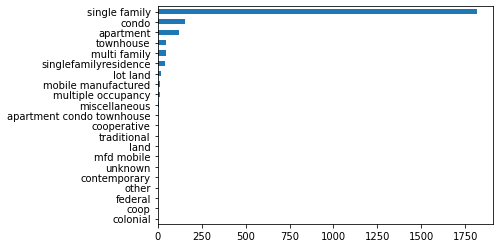

In [1164]:
df_test['propertyType'].value_counts(ascending=True).plot.barh()

In [1165]:
# Заменим null значения
most_prop = df_test['propertyType'].value_counts().index[0]

df_test.loc[df_test['propertyType'].isna(), 'propertyType'] = most_prop

In [1166]:
# Можно из трейна удалить те значения propertyType, которых нет в тесте и удалить их
# !!! на будущее

In [1167]:
df_test['street'].value_counts(dropna=False)[:10]

street               17
1st street           11
12th street           9
livingston street     9
12th avenue           8
9th street            7
harrison street       7
avenue                7
2nd street            6
collins avenue        6
Name: street, dtype: int64

In [1168]:
most_street = df_test['street'].value_counts().index[0]

df_test.loc[df_test['street'].isna(), 'street'] = most_street

In [1169]:
mean_sqft = round(df_test['sqft'].dropna().mean())

df_test.loc[df_test['sqft'].isna(), 'sqft'] = mean_sqft

In [1170]:
mean_dist_max = round(df_test['dist_max'].dropna().mean())

df_test.loc[df_test['dist_max'].isna(), 'dist_max'] = mean_dist_max

In [1171]:
mean_dist_min = round(df_test['dist_min'].dropna().mean())

df_test.loc[df_test['dist_min'].isna(), 'dist_min'] = mean_dist_max

In [1172]:
mean_dist_mean = round(df_test['dist_mean'].dropna().mean())

df_test.loc[df_test['dist_mean'].isna(), 'dist_mean'] = mean_dist_max

In [1173]:
mean_rate_max = round(df_test['rate_max'].dropna().mean())

df_test.loc[df_test['rate_max'].isna(), 'rate_max'] = mean_dist_max

In [1174]:
mean_rate_min = round(df_test['rate_min'].dropna().mean())

df_test.loc[df_test['rate_min'].isna(), 'rate_min'] = mean_dist_max

In [1175]:
mean_rate_mean = round(df_test['rate_mean'].dropna().mean())

df_test.loc[df_test['rate_mean'].isna(), 'rate_mean'] = mean_dist_max

In [1176]:
# Дополнительно выделить столбцы с Null значениями

Обработка финального датасета

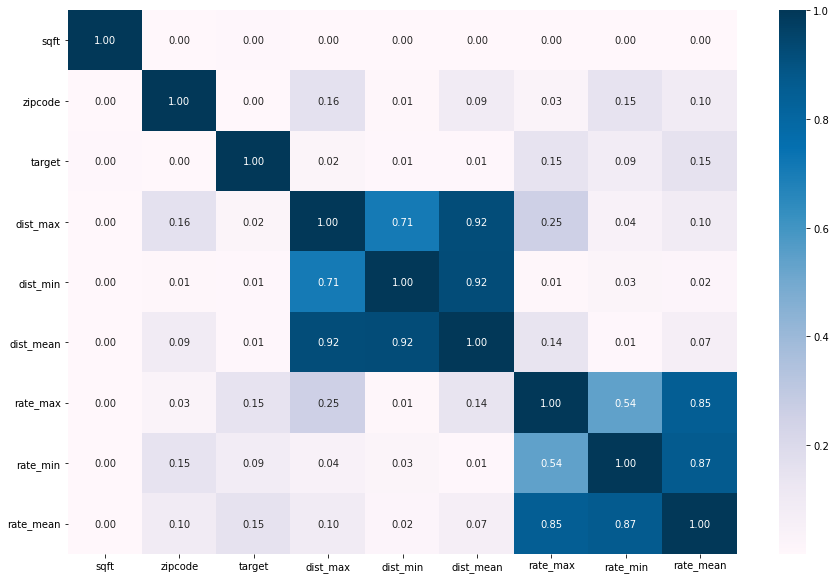

In [1184]:
# Рассмотрим матрицу корреляции для начального удаления сильно скоррелированных признаков

plt.figure(figsize=(15,10))

sns.heatmap(df_train.corr().abs(), annot=True, fmt='.2f', cmap='PuBu')
plt.yticks(rotation=0)
plt.show()

In [1190]:
# Удаляем mean значения из dist и rate
# Пока без токенайзера, поэтому не будем включать столбец street
categorical_features = ['status', 'propertyType', 'city', 'zipcode', 'state']
numerical_features = ['sqft', 'dist_max', 'dist_min', 'rate_max', 'rate_min']
value = ['target']

In [1196]:
# Смотрим выбросы

data_out = data_outlier(numerical_features + value, df_train)
data_out

,name,count,min,mean,max,low_range,upper_range,out_count
0,sqft,326765.0,0.00,18722.49,7.959794e+08,-1016.00,5104.00,28661.0
1,dist_max,326765.0,0.02,4.98,1.591090e+03,-3.92,10.92,34693.0
2,dist_min,326765.0,0.01,1.19,1.590380e+03,-1.02,2.70,27885.0
3,rate_max,326765.0,1.00,6.70,1.000000e+01,-1.00,15.00,0.0
4,rate_min,326765.0,1.00,3.69,1.000000e+01,-2.50,9.50,557.0
5,target,326765.0,1.00,615877.95,1.950000e+08,-386000.00,1150000.00,31408.0


In [1019]:
# Задаем типы переменных

